<a href="https://colab.research.google.com/github/madfrantic/helloworld/blob/main/project02c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# hello world Project02
# NYPD Hate Crimes Analysis ***bold text***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
url = "https://raw.githubusercontent.com/madfrantic/helloworld/refs/heads/main/NYPD_Hate_Crimes_20251209.csv"
df = pd.read_csv(url)

print("Dataset Info:")
df.info()

print("\nHead:")
print(df.head(10))

print("\nTail:")
print(df.tail(10))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Full Complaint ID              3872 non-null   int64  
 1   Complaint Year Number          3872 non-null   int64  
 2   Month Number                   3872 non-null   int64  
 3   Record Create Date             3872 non-null   object 
 4   Complaint Precinct Code        3872 non-null   int64  
 5   Patrol Borough Name            3872 non-null   object 
 6   County                         3872 non-null   object 
 7   Law Code Category Description  3872 non-null   object 
 8   Offense Description            3872 non-null   object 
 9   PD Code Description            3872 non-null   object 
 10  Bias Motive Description        3872 non-null   object 
 11  Offense Category               3872 non-null   object 
 12  Arrest Date                    0 n

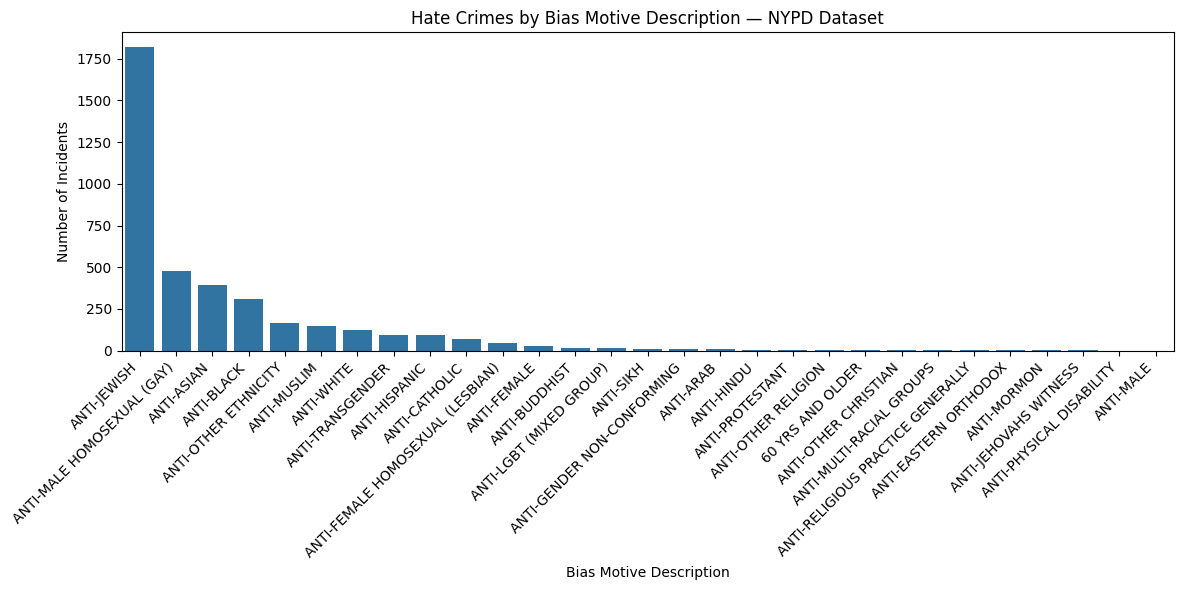

In [17]:
bias_col = "Bias Motive Description"

bias_counts = df[bias_col].value_counts(dropna=False)
bias_counts = bias_counts[bias_counts.index.notna()]

plt.figure(figsize=(12, 6))
sns.barplot(x=bias_counts.index, y=bias_counts.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Incidents")
plt.xlabel("Bias Motive Description")
plt.title("Hate Crimes by Bias Motive Description — NYPD Dataset")
plt.tight_layout()
plt.show()


ANTI-JEWISH — Offense Description

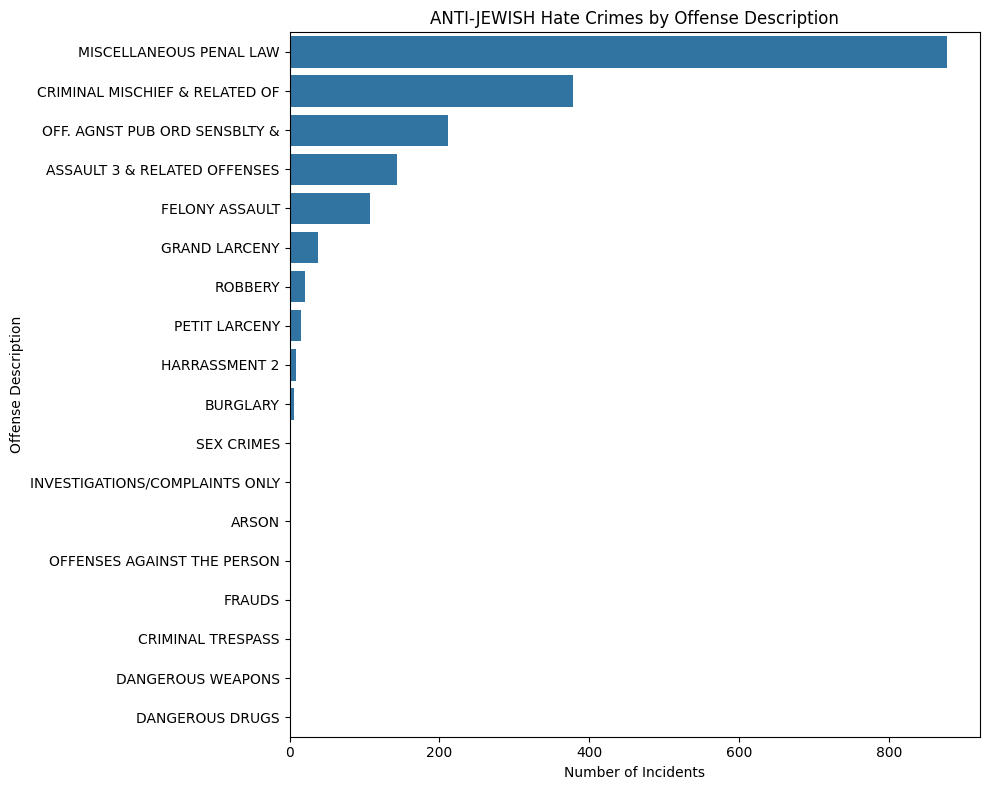

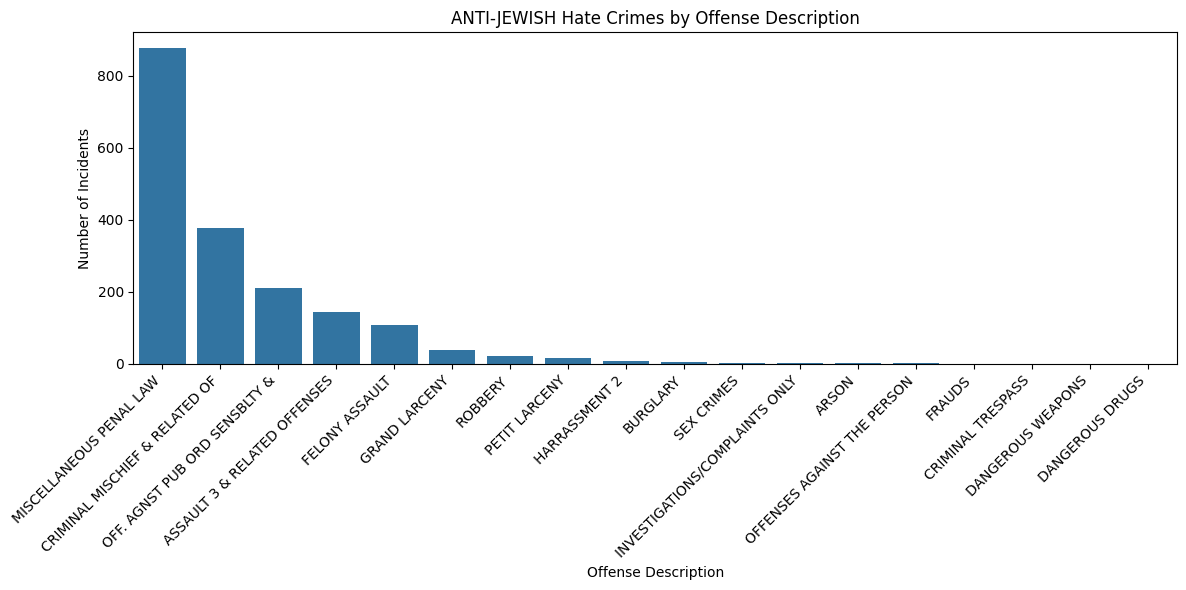

In [6]:
offense_col = "Offense Description"

df_jewish = df[df[bias_col] == "ANTI-JEWISH"]

offense_counts = df_jewish[offense_col].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=offense_counts.values, y=offense_counts.index)
plt.title("ANTI-JEWISH Hate Crimes by Offense Description")
plt.xlabel("Number of Incidents")
plt.ylabel("Offense Description")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=offense_counts.index, y=offense_counts.values)
plt.xticks(rotation=45, ha="right")
plt.title("ANTI-JEWISH Hate Crimes by Offense Description")
plt.xlabel("Offense Description")
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()


ANTI-JEWISH — Yearly Counts

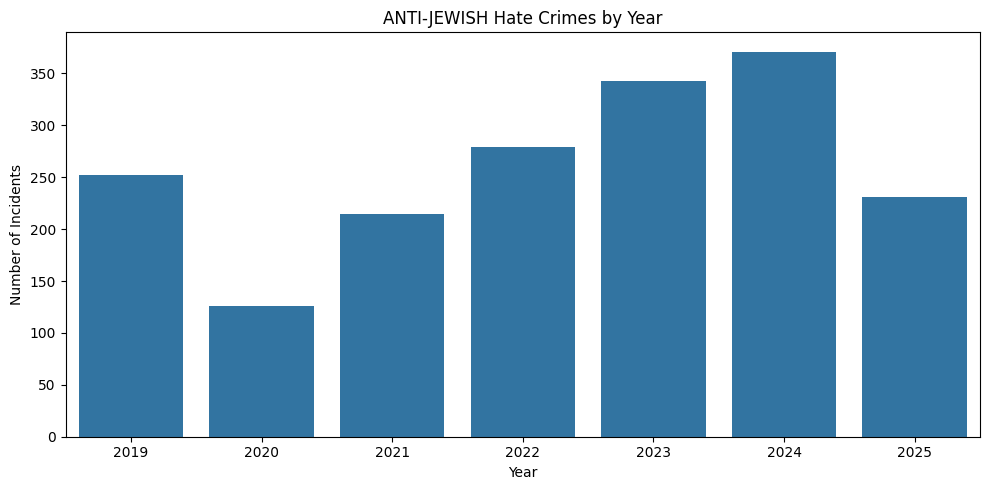

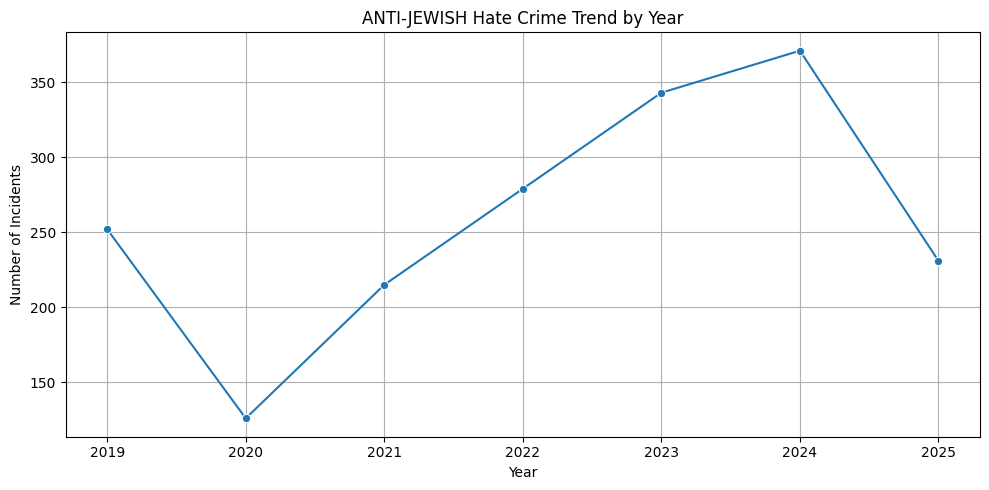

In [8]:
year_col = "Complaint Year Number"

year_counts = df_jewish[year_col].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title("ANTI-JEWISH Hate Crimes by Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
plt.title("ANTI-JEWISH Hate Crime Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.tight_layout()
plt.show()


Heatmap: Offense by Year

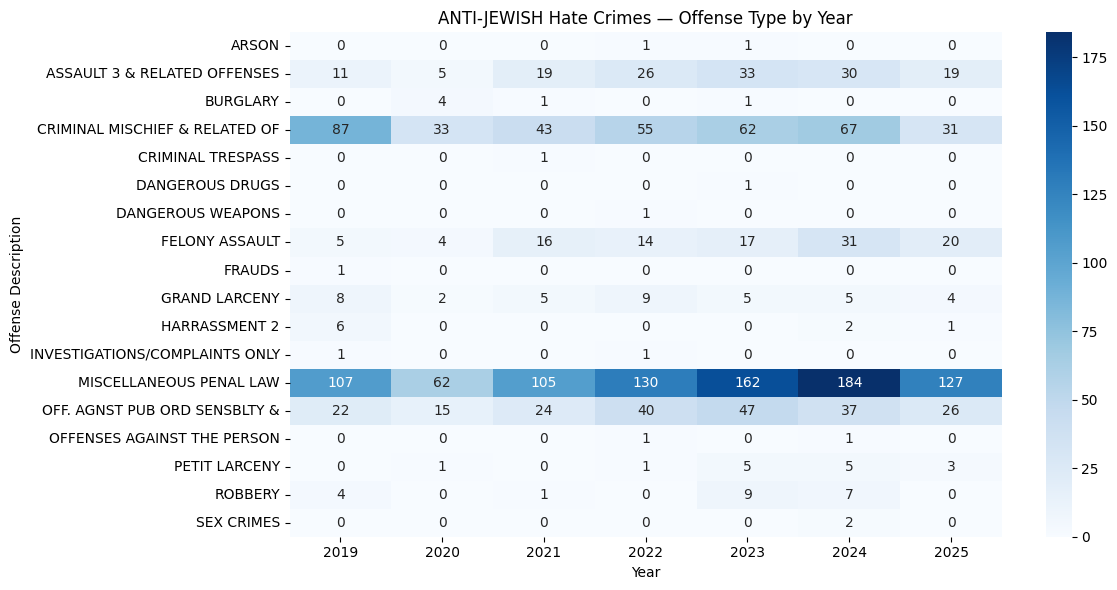

In [9]:
pivot_offense_year = df_jewish.pivot_table(
    index=offense_col,
    columns=year_col,
    aggfunc='size',
    fill_value=0
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_offense_year, cmap="Blues", annot=True, fmt="d")
plt.title("ANTI-JEWISH Hate Crimes — Offense Type by Year")
plt.xlabel("Year")
plt.ylabel("Offense Description")
plt.tight_layout()
plt.show()


Yearly Trend for Each Offense Category

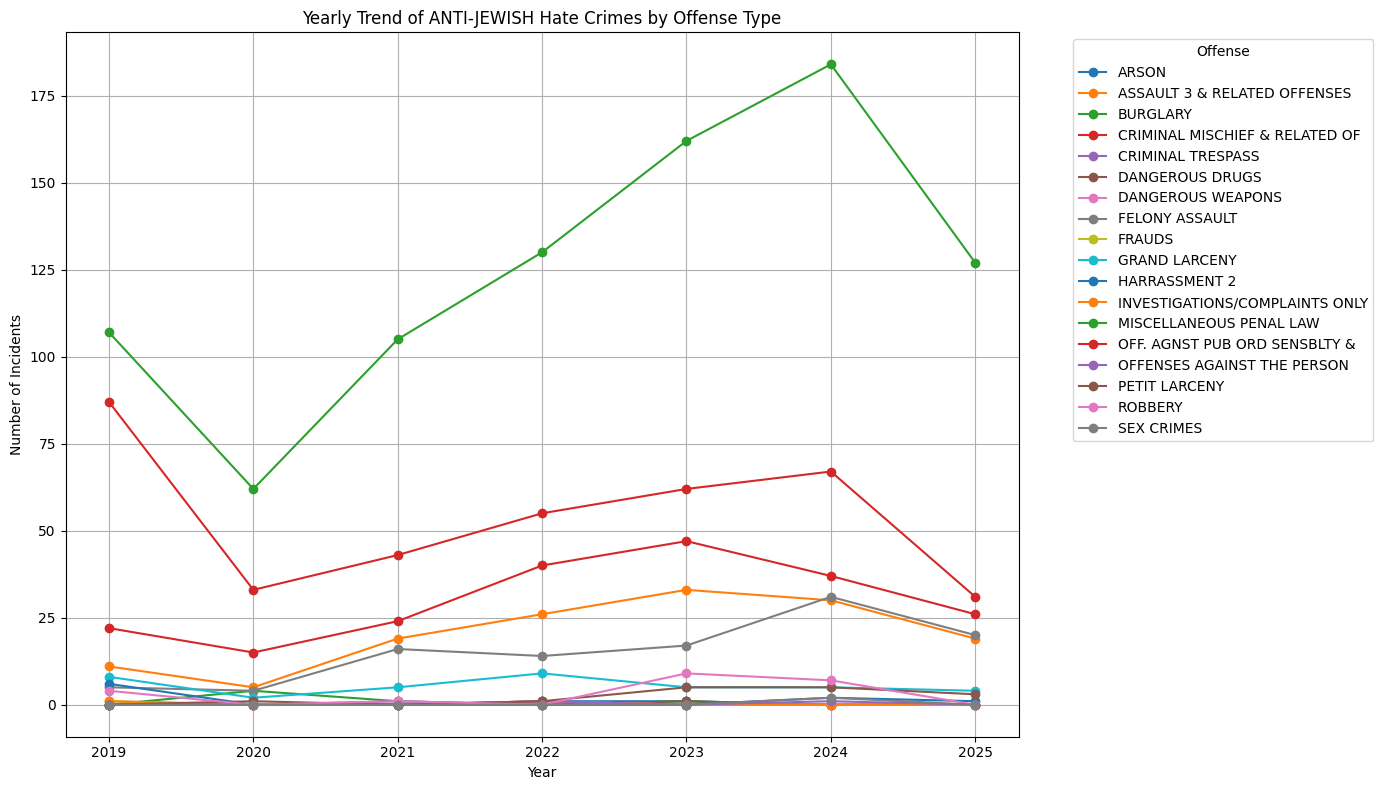

In [10]:
pivot_year_offense = df_jewish.pivot_table(
    index=year_col,
    columns=offense_col,
    aggfunc='size',
    fill_value=0
)

plt.figure(figsize=(14, 8))
for offense in pivot_year_offense.columns:
    plt.plot(pivot_year_offense.index, pivot_year_offense[offense], marker="o", label=offense)

plt.title("Yearly Trend of ANTI-JEWISH Hate Crimes by Offense Type")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.legend(title="Offense", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Top 5 Offenses Only

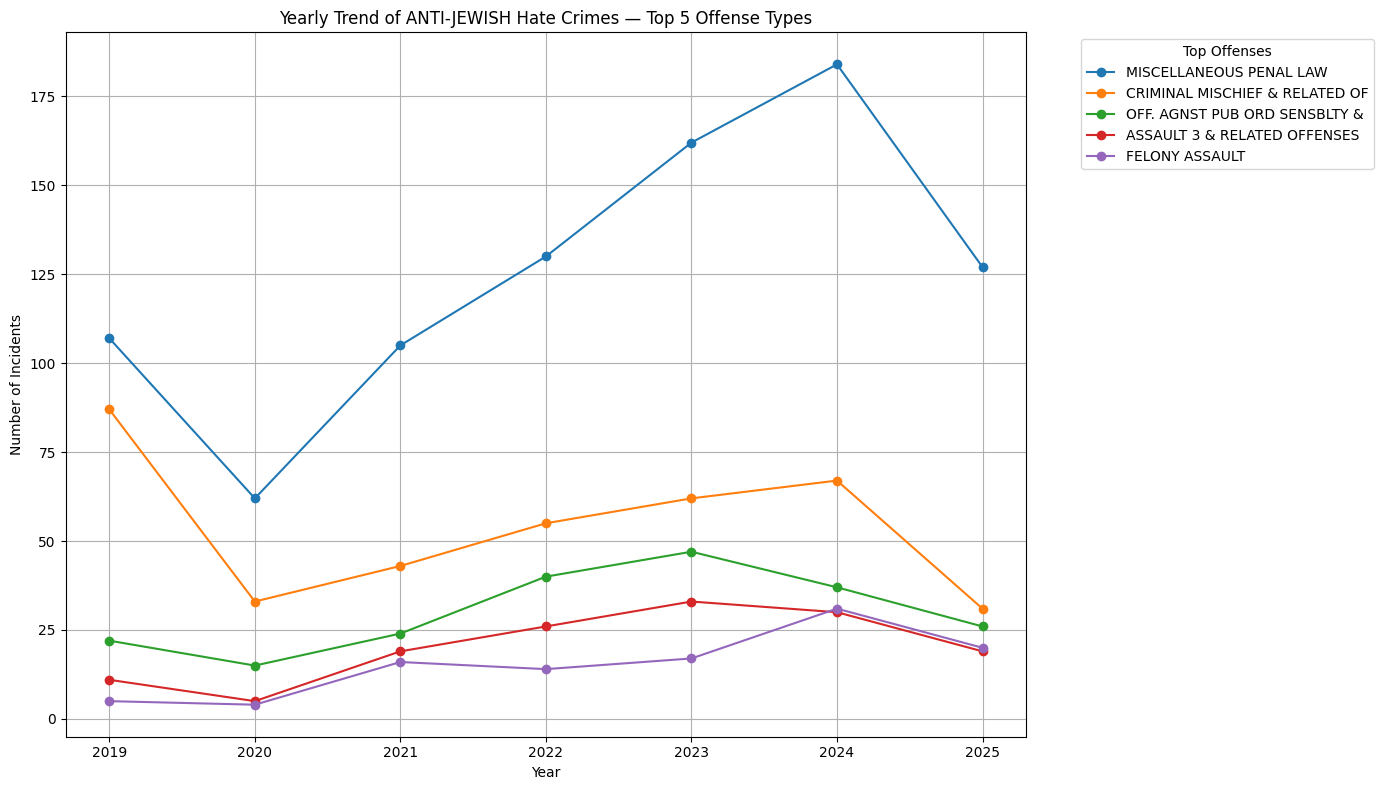

In [11]:
top_n = 5
top_offenses = df_jewish[offense_col].value_counts().head(top_n).index

plt.figure(figsize=(14, 8))
for offense in top_offenses:
    plt.plot(pivot_year_offense.index, pivot_year_offense[offense], marker="o", label=offense)

plt.title(f"Yearly Trend of ANTI-JEWISH Hate Crimes — Top {top_n} Offense Types")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.legend(title="Top Offenses", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Patrol Borough Breakdown

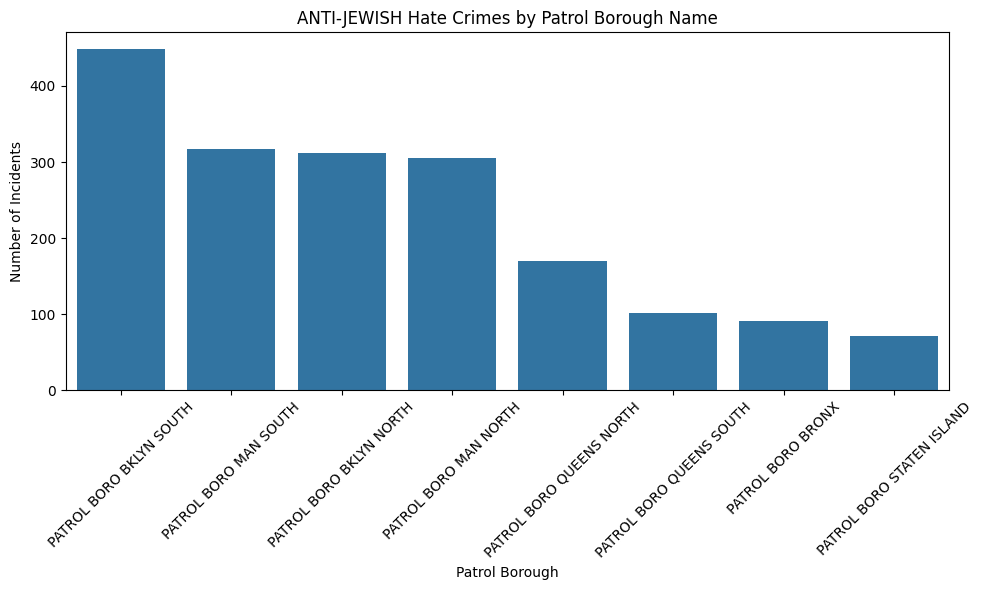

In [12]:
boro_col = "Patrol Borough Name"

boro_counts = df_jewish[boro_col].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=boro_counts.index, y=boro_counts.values)
plt.title("ANTI-JEWISH Hate Crimes by Patrol Borough Name")
plt.xlabel("Patrol Borough")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

in conclusion: anti-Jew has the most hate crimes. mostly in the South Brooklyn.
**bold text**
